# Load dataset

In [1]:
import pandas as pd
from tqdm import tqdm

tqdm.pandas()

df = pd.read_csv('/kaggle/input/rekomendasi-jurnal/data.csv')
df.head()

,no,judul,abstrak,fakultas,jurnal
0,1,A Dynamic Study between Export from China to S...,This paper applies annual data from 1998 to 20...,FE,Jurnal Ekonomi dan Studi Pembangunan
1,2,A Panel Approach: How Does Government Expendit...,This study investigates the influence of gover...,FE,Jurnal Ekonomi dan Studi Pembangunan
2,3,Turnover Intention in Public Accountant Firms ...,This research aims to investigate empirically ...,FE,JABE (JOURNAL OF ACCOUNTING AND BUSINESS EDUCA...
3,4,The Factors Influencing Perceived Ease of Use ...,This research aims at analyzing the influence ...,FE,JABE (JOURNAL OF ACCOUNTING AND BUSINESS EDUCA...
4,5,Raising Awareness of Primary School Students' ...,Respect contributes to restraining the frequen...,FIP,Buletin Konseling Inovatif


## Analysis

In [2]:
# Total rows in each category
df['jurnal'].value_counts()

Jurnal Ekonomi dan Studi Pembangunan                   6
JABE (JOURNAL OF ACCOUNTING AND BUSINESS EDUCATION)    6
Buletin Konseling Inovatif                             2
Jurnal Kajian Matematika dan Aplikasinya (JKMA)        2
JURNAL TEKNIK MESIN DAN PEMBELAJARAN                   2
Jurnal Pendidikan Sejarah Indonesia                    2
Name: jurnal, dtype: int64

In [3]:
# Get average words in each category
df['word_count'] = df['judul'].apply(lambda x: len(x.split()))
df.groupby('jurnal')['word_count'].mean()

jurnal
Buletin Konseling Inovatif                             12.0
JABE (JOURNAL OF ACCOUNTING AND BUSINESS EDUCATION)    11.0
JURNAL TEKNIK MESIN DAN PEMBELAJARAN                   16.5
Jurnal Ekonomi dan Studi Pembangunan                   13.5
Jurnal Kajian Matematika dan Aplikasinya (JKMA)        13.5
Jurnal Pendidikan Sejarah Indonesia                    14.0
Name: word_count, dtype: float64

In [4]:
# Get average characters in each category
df['char_count'] = df['judul'].apply(lambda x: len(str(x)))
df.groupby('jurnal')['char_count'].mean()

jurnal
Buletin Konseling Inovatif                              97.500000
JABE (JOURNAL OF ACCOUNTING AND BUSINESS EDUCATION)     83.833333
JURNAL TEKNIK MESIN DAN PEMBELAJARAN                   114.500000
Jurnal Ekonomi dan Studi Pembangunan                    93.000000
Jurnal Kajian Matematika dan Aplikasinya (JKMA)         98.500000
Jurnal Pendidikan Sejarah Indonesia                    102.500000
Name: char_count, dtype: float64

In [5]:
# Is there any duplicated rows?
df[df['judul'].duplicated()]

,no,judul,abstrak,fakultas,jurnal,word_count,char_count


# Preprocessing

In [6]:
!pip install Sastrawi --quiet

In [7]:
import nltk

# Tokenizing
nltk.download('punkt')
# Stopwords removal
nltk.download('stopwords')
# Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

print('Completed')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


Completed


## Remove duplicates

In [8]:
df.drop(df[df['judul'].duplicated()].index, inplace=True)
df['judul']

0     A Dynamic Study between Export from China to S...
1     A Panel Approach: How Does Government Expendit...
2     Turnover Intention in Public Accountant Firms ...
3     The Factors Influencing Perceived Ease of Use ...
4     Raising Awareness of Primary School Students' ...
5     Panduan Konseling dengan Teknik Coping Self-Ta...
6     MULTI-INPUT TRANSFER FUNCTION MODEL IN FORECAS...
7     TWO PHASE HEURISTIC ALGORITHM (TPHA) ON MULTIP...
8     STUDY OF MANAGEMENT OF COMPETENCY TEST EXPERTI...
9     HAZARDS OF WELDING LIGHT SMOKE AND RADIATION T...
10    Education on History and Character of the Nati...
11    Reflection of Local Culture "Philosophical Mea...
12    The Effect of Investment Toward Economic Growt...
13    Testing Weak Form Market Efficiency and its Im...
14    Relationship Between Growth and Unemployment i...
15    The Determinants of Income Inequality in Europ...
16    Client’s Effort in Intervening State’s Financi...
17    Individualized Excel-Based Exams to Preven

## Cleaning text

In [9]:
import re, string

# Cleaning
def cleaning(text):
  # Case folding
  text = text.lower() 
  # Trim text
  text = text.strip()
  # Remove punctuations, special characters, and double whitespace
  text = re.compile('<.*?>').sub('', text) 
  text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
  text = re.sub('\s+', ' ', text)
  # Number removal
  text = re.sub(r'\[[0-9]*\]', ' ', text) 
  text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
  # Remove number and whitespaces
  text = re.sub(r'\d', ' ', text)
  text = re.sub(r'\s+', ' ', text)

  return text

df['clean'] = df['judul'].progress_apply(lambda x: cleaning(x))
df['clean']

100%|██████████| 20/20 [00:00<00:00, 8461.38it/s]


0     a dynamic study between export from china to s...
1     a panel approach how does government expenditu...
2     turnover intention in public accountant firms ...
3     the factors influencing perceived ease of use ...
4     raising awareness of primary school students r...
5     panduan konseling dengan teknik coping self ta...
6     multi input transfer function model in forecas...
7     two phase heuristic algorithm tpha on multiple...
8     study of management of competency test experti...
9     hazards of welding light smoke and radiation t...
10    education on history and character of the nati...
11    reflection of local culture philosophical mean...
12    the effect of investment toward economic growt...
13    testing weak form market efficiency and its im...
14    relationship between growth and unemployment i...
15    the determinants of income inequality in europ...
16    clients effort in intervening states financial...
17    individualized excel based exams to preven

## Tokenizing
Convert word into tokens<br>
'I love burger' --> ['I', 'love', 'burger']

In [10]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['clean'].progress_apply(lambda x: word_tokenize(x))
df['tokens']

100%|██████████| 20/20 [00:00<00:00, 1192.05it/s]


0     [a, dynamic, study, between, export, from, chi...
1     [a, panel, approach, how, does, government, ex...
2     [turnover, intention, in, public, accountant, ...
3     [the, factors, influencing, perceived, ease, o...
4     [raising, awareness, of, primary, school, stud...
5     [panduan, konseling, dengan, teknik, coping, s...
6     [multi, input, transfer, function, model, in, ...
7     [two, phase, heuristic, algorithm, tpha, on, m...
8     [study, of, management, of, competency, test, ...
9     [hazards, of, welding, light, smoke, and, radi...
10    [education, on, history, and, character, of, t...
11    [reflection, of, local, culture, philosophical...
12    [the, effect, of, investment, toward, economic...
13    [testing, weak, form, market, efficiency, and,...
14    [relationship, between, growth, and, unemploym...
15    [the, determinants, of, income, inequality, in...
16    [clients, effort, in, intervening, states, fin...
17    [individualized, excel, based, exams, to, 

## Stopwords removal
Remove stopwords from tokens

In [11]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['tokens'] = df['tokens'].progress_apply(lambda x: [w for w in x if not w in stop_words])
df['tokens']

100%|██████████| 20/20 [00:00<00:00, 26681.32it/s]


0     [dynamic, study, export, china, south, korea, ...
1     [panel, approach, government, expenditure, inf...
2     [turnover, intention, public, accountant, firm...
3     [factors, influencing, perceived, ease, use, e...
4     [raising, awareness, primary, school, students...
5     [panduan, konseling, teknik, coping, self, tal...
6     [multi, input, transfer, function, model, fore...
7     [two, phase, heuristic, algorithm, tpha, multi...
8     [study, management, competency, test, expertis...
9     [hazards, welding, light, smoke, radiation, we...
10    [education, history, character, nation, introd...
11    [reflection, local, culture, philosophical, me...
12    [effect, investment, toward, economic, growth,...
13    [testing, weak, form, market, efficiency, impa...
14    [relationship, growth, unemployment, petroleum...
15    [determinants, income, inequality, europe, tra...
16    [clients, effort, intervening, states, financi...
17    [individualized, excel, based, exams, prev

## Stem & Lemmatizer

In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
 
df['tokens'] = df['tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))
df['tokens']

100%|██████████| 20/20 [00:22<00:00,  1.14s/it]


0     [dynamic, study, export, china, south, korea, ...
1     [panel, approach, government, expenditure, inf...
2     [turnover, intention, public, accountant, firm...
3     [factors, influencing, perceived, ease, use, e...
4     [raising, awareness, primary, school, students...
5     [pandu, konseling, teknik, coping, self, talk,...
6     [multi, input, transfer, function, model, fore...
7     [two, phase, heuristic, algorithm, tpha, multi...
8     [study, management, competency, test, expertis...
9     [hazards, welding, light, smoke, radiation, we...
10    [education, history, character, nation, introd...
11    [reflection, local, culture, philosophical, me...
12    [effect, investment, toward, economic, growth,...
13    [testing, weak, form, market, efficiency, impa...
14    [relationship, growth, unemployment, petroleum...
15    [determinants, income, inequality, europe, tra...
16    [clients, effort, intervening, states, financi...
17    [individualized, excel, based, exams, prev

In [13]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['tokens'] = df['tokens'].progress_apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['tokens']

100%|██████████| 20/20 [00:01<00:00, 10.79it/s]


0     [dynamic, study, export, china, south, korea, ...
1     [panel, approach, government, expenditure, inf...
2     [turnover, intention, public, accountant, firm...
3     [factor, influencing, perceived, ease, use, e,...
4     [raising, awareness, primary, school, student,...
5     [pandu, konseling, teknik, coping, self, talk,...
6     [multi, input, transfer, function, model, fore...
7     [two, phase, heuristic, algorithm, tpha, multi...
8     [study, management, competency, test, expertis...
9     [hazard, welding, light, smoke, radiation, wel...
10    [education, history, character, nation, introd...
11    [reflection, local, culture, philosophical, me...
12    [effect, investment, toward, economic, growth,...
13    [testing, weak, form, market, efficiency, impa...
14    [relationship, growth, unemployment, petroleum...
15    [determinant, income, inequality, europe, trad...
16    [client, effort, intervening, state, financial...
17    [individualized, excel, based, exam, preve

# Split data

In [14]:
from sklearn.model_selection import train_test_split

df['joined_tokens'] = df['tokens'].apply(lambda x: ' '.join(x))
X_train, X_test, y_train, y_test = train_test_split(df['joined_tokens'], df['jurnal'], test_size=0.3, random_state=42)

# Feature extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True)

X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

print('Train size: ', X_train_vectors_tfidf.shape)
print('Test size: ', X_test_vectors_tfidf.shape)

Train size:  (14, 116)
Test size:  (6, 116)


In [16]:
" ".join(tfidf_vectorizer.vocabulary_.keys())

'reflection local culture philosophical meaning symbolism classical batik motif strengthening character education factor influencing perceived ease use learning accounting lecturer peer tutoring best practice vocational client effort intervening state financial audit result grounded theory approach testing weak form market efficiency impact stock valuation empirical evidence bangladesh turnover intention public accountant firm east java hazard welding light smoke radiation worker informal sector student satisfaction mediate correlation service quality academic engagement achievement raising awareness primary school respect biblioeducation effect investment toward economic growth economy two phase heuristic algorithm tpha multiple traveling salesman problem mtsp program implementation history nation introduction dialogue relationship unemployment petroleum exporting country case congo multi input transfer function model forecasting malang city hotel tax revenue'

# Resampling

In [17]:
y_train.value_counts()

JABE (JOURNAL OF ACCOUNTING AND BUSINESS EDUCATION)    5
Jurnal Ekonomi dan Studi Pembangunan                   3
Jurnal Pendidikan Sejarah Indonesia                    2
Jurnal Kajian Matematika dan Aplikasinya (JKMA)        2
JURNAL TEKNIK MESIN DAN PEMBELAJARAN                   1
Buletin Konseling Inovatif                             1
Name: jurnal, dtype: int64

In [18]:
# from imblearn.over_sampling import SMOTE

# X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_vectors_tfidf, y_train)

In [19]:
X_train_resampled, y_train_resampled = X_train_vectors_tfidf, y_train

In [20]:
y_train_resampled.value_counts()

JABE (JOURNAL OF ACCOUNTING AND BUSINESS EDUCATION)    5
Jurnal Ekonomi dan Studi Pembangunan                   3
Jurnal Pendidikan Sejarah Indonesia                    2
Jurnal Kajian Matematika dan Aplikasinya (JKMA)        2
JURNAL TEKNIK MESIN DAN PEMBELAJARAN                   1
Buletin Konseling Inovatif                             1
Name: jurnal, dtype: int64

# Training model

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = SVC(kernel='rbf')
clf.fit(X_train_resampled, y_train_resampled)

y_pred = clf.predict(X_test_vectors_tfidf)

print('Accuracy score : ', accuracy_score(y_test, y_pred))
print('Precision score : ', precision_score(y_test, y_pred, average='weighted'))
print('Recall score : ', recall_score(y_test, y_pred, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred, average='weighted'))

Accuracy score :  0.16666666666666666
Precision score :  0.027777777777777776
Recall score :  0.16666666666666666
F1 score :  0.047619047619047616


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


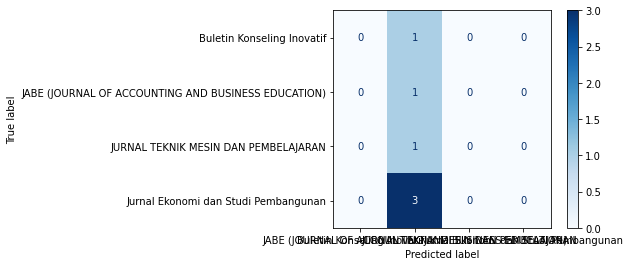

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                                                     precision    recall  f1-score   support

                         Buletin Konseling Inovatif       0.00      0.00      0.00         1
JABE (JOURNAL OF ACCOUNTING AND BUSINESS EDUCATION)       0.17      1.00      0.29         1
               JURNAL TEKNIK MESIN DAN PEMBELAJARAN       0.00      0.00      0.00         1
               Jurnal Ekonomi dan Studi Pembangunan       0.00      0.00      0.00         3

                                           accuracy                           0.17         6
                                          macro avg       0.04      0.25      0.07         6
                                       weighted avg       0.03      0.17      0.05         6



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Export model

In [24]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Export data

In [25]:
df.to_csv('data.csv')